In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from datetime import datetime


In [2]:
df = pd.read_csv('marketing_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df = df.drop('ID', axis=1)

In [7]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
 Income                1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [9]:
df.columns = df.columns.str.replace(' ','')

In [10]:
df.duplicated().sum()

47

In [11]:
df.describe()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df['Income'] = df['Income'].str.replace('$', '').str.replace(',','')

In [13]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,84835.00,0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.00,0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,67267.00,0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,32474.00,1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,21474.00,1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP


In [14]:
df['Income'] = df['Income'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [18]:
df.groupby(['Education','Marital_Status'])['Income'].mean()

Education   Marital_Status
2n Cycle    Divorced          49395.130435
            Married           46201.100000
            Single            53673.944444
            Together          44736.410714
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            18238.666667
            Together          21240.071429
            Widow             22123.000000
Graduation  Absurd            79244.000000
            Alone             34176.000000
            Divorced          54526.042017
            Married           50800.258741
            Single            51322.182927
            Together          55758.480702
            Widow             54976.657143
Master      Absurd            65487.000000
            Alone             61331.000000
            Divorced          50331.945946
            Married           53286.028986
            Single            53530.560000
            Together       

In [19]:
df[df.isnull().any(axis=True)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,...,8,9,0,0,0,0,0,0,0,GER
262,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,...,2,7,0,0,0,0,0,0,0,US
394,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,...,3,7,0,0,0,0,0,0,0,AUS
449,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,...,0,1,0,0,0,0,0,0,0,AUS
525,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,...,7,6,0,0,0,0,0,0,0,CA
590,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,...,3,8,0,0,0,0,0,0,0,GER
899,1970,Master,Together,NaN,0,1,2013-04-01,39,187,5,...,6,5,0,0,0,0,0,0,0,US
997,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,...,2,7,0,0,0,0,0,0,0,GER
1096,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,1,...,2,7,0,0,0,0,0,0,0,AUS
1185,1969,Master,Together,NaN,1,1,2013-05-18,52,375,42,...,4,3,0,0,0,0,0,0,0,AUS


In [20]:
df2 = df.copy()

In [21]:
df2['Income'] = df2['Income'].fillna(df2.groupby(['Education','Marital_Status'])['Income'].transform('mean'))

df2['Income'].mean()

52248.748824908515

In [22]:
df2['Total_children'] = df2[['Kidhome','Teenhome']].sum(axis = 1)

In [23]:
current_year = datetime.now().year

In [24]:
df2['Age'] = current_year - df2['Year_Birth']

In [25]:
df2['MntTotal'] = df2[['MntWines','MntFruits','MntSweetProducts','MntFishProducts','MntGoldProds']].sum(axis = 1)

In [26]:
df2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_children,Age,MntTotal
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,0,0,0,0,1,0,SP,0,54,811
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,0,0,1,1,0,CA,0,63,513
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,US,1,66,192
3,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,0,0,0,0,0,0,AUS,2,57,10
4,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,0,0,0,0,1,0,SP,1,35,67


In [27]:
df2.duplicated().sum()

47

<Axes: ylabel='Total_children'>

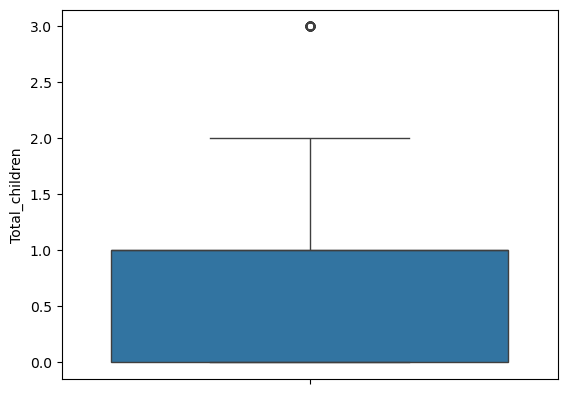

In [28]:
sns.boxplot(data = df2['Total_children'] )

<Axes: ylabel='MntTotal'>

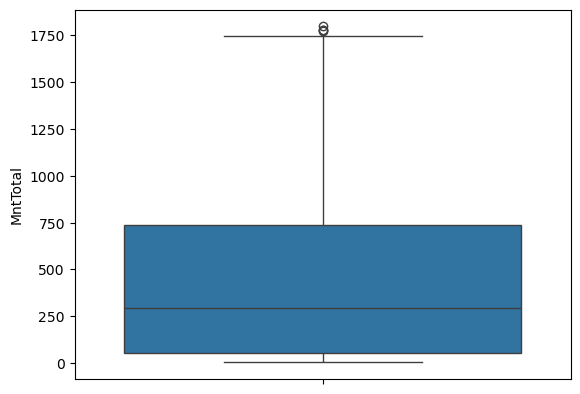

In [29]:
sns.boxplot(data = df2['MntTotal'] )

<Axes: ylabel='Age'>

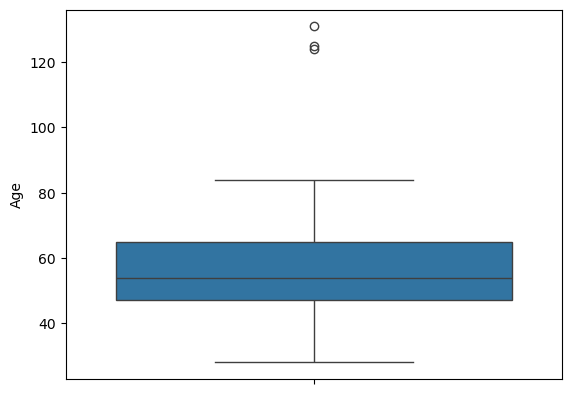

In [30]:
sns.boxplot(data = df2['Age'] )

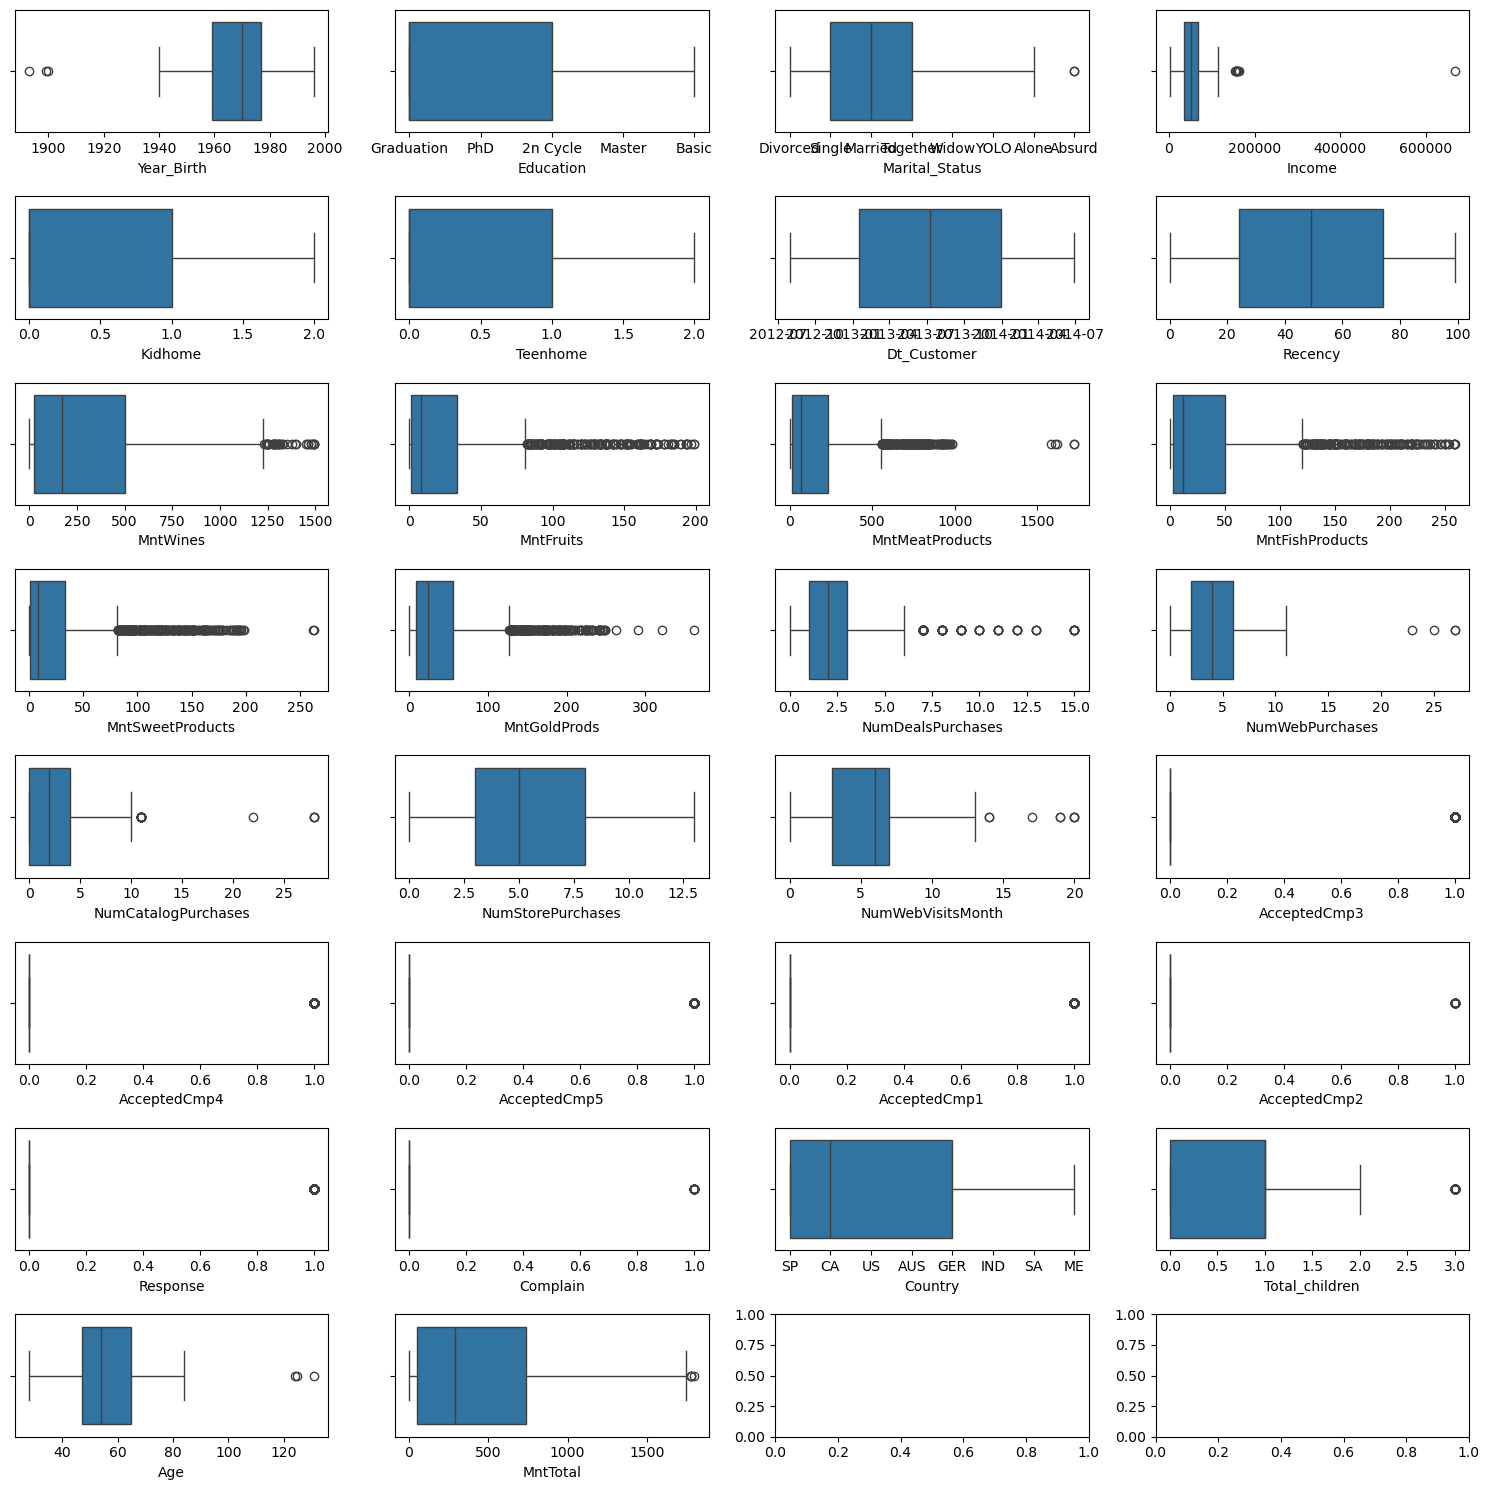

In [31]:
fig, axes = plt.subplots(8,4, figsize=(15,15))

for i, ax in enumerate(axes.flatten()):
    if i < len(df2.columns):
        sns.boxplot(x=df2[df2.columns[i]], ax=ax)
plt.tight_layout()
plt.show()

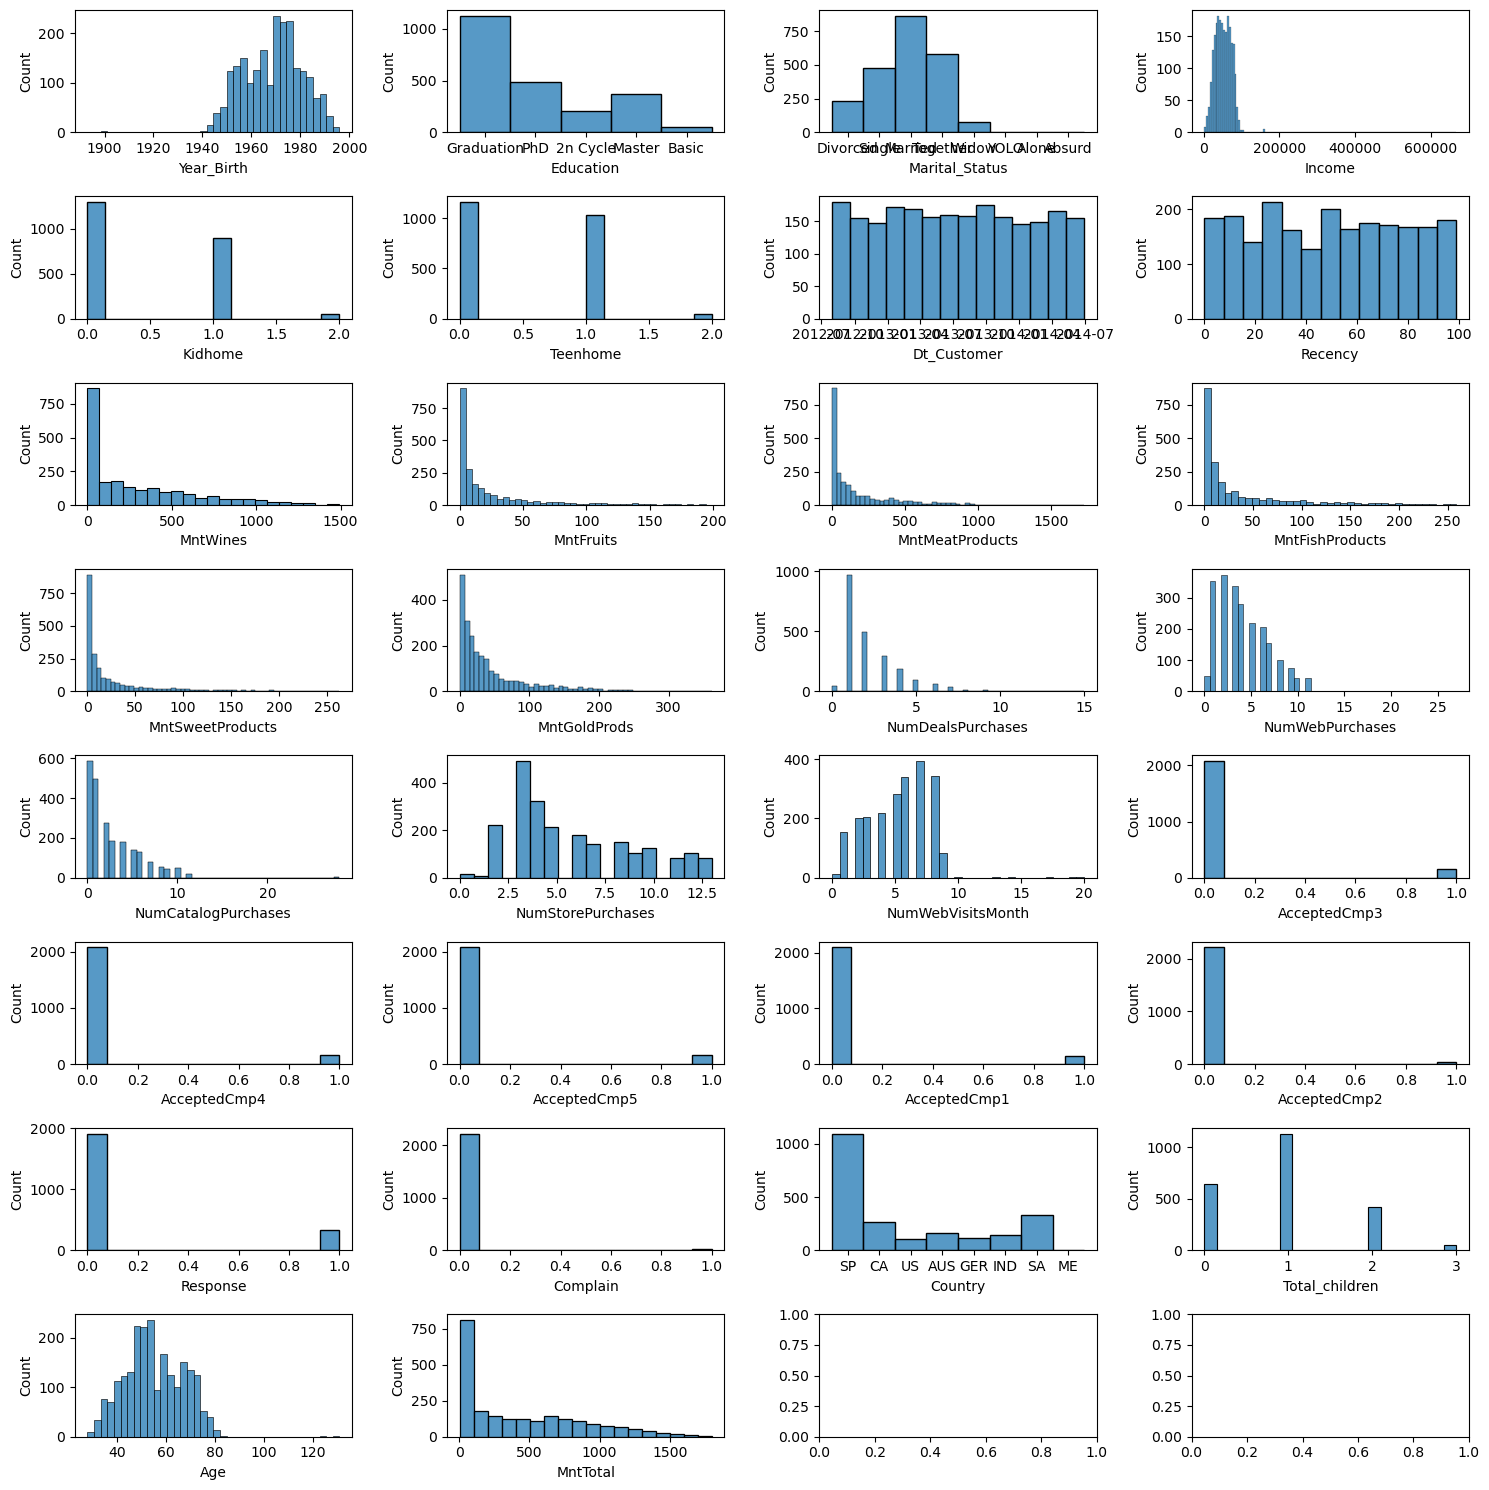

In [32]:
fig, axes = plt.subplots(8,4, figsize=(15,15))

for i, ax in enumerate(axes.flatten()):
    if i < len(df2.columns):
        sns.histplot(x=df2[df2.columns[i]], ax=ax)
plt.tight_layout()
plt.show()

In [33]:
#removing outliers from income, age, total spendings, total children, MntWines, MntFruits,  MntMeatProducts,  MntFishProducts,  MntSweetProducts,  MntGoldProds
# using IQR method
df3 = df2.copy()
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns = ['Income', 'Age', 'MntTotal', 'Total_children', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for column in columns:
    df3 = remove_outliers(df3, column)

df3

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_children,Age,MntTotal
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,0,0,1,1,0,CA,0,63,513
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,US,1,66,192
3,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,0,0,0,0,0,0,AUS,2,57,10
4,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,0,0,0,0,1,0,SP,1,35,67
7,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,0,...,0,0,0,0,0,0,SP,1,57,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1973,Graduation,Widow,42429.0,0,1,2014-02-11,99,55,0,...,0,0,0,0,0,0,AUS,1,51,61
2232,1973,Graduation,Widow,42429.0,0,1,2014-02-11,99,55,0,...,0,0,0,0,0,0,SP,1,51,61
2234,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,11,...,0,0,0,0,0,0,US,1,51,425
2236,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,...,0,0,0,0,0,0,SP,1,47,42


In [34]:
df['NumWebPurchases']= df['NumWebPurchases'].astype(int)
df['NumCatalogPurchases']= df['NumCatalogPurchases'].astype(int)
df['NumStorePurchases']= df['NumStorePurchases'].astype(int)

In [35]:
df3['Total_Purchases'] = df[['NumWebPurchases' ,'NumCatalogPurchases','NumStorePurchases']].sum(axis = 1)

In [36]:
df4 = df3.copy()
df4 = pd.get_dummies(df4, columns=['Education', 'Marital_Status', 'Country'], drop_first=False)
df4

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,...,False,False,False,True,False,False,False,False,False,False
2,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,...,False,False,False,False,False,False,False,False,False,True
3,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,...,False,False,True,False,False,False,False,False,False,False
4,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,...,False,False,False,False,False,False,False,False,True,False
7,1967,44931.0,0,1,2014-01-18,0,78,0,11,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1973,42429.0,0,1,2014-02-11,99,55,0,6,2,...,True,False,True,False,False,False,False,False,False,False
2232,1973,42429.0,0,1,2014-02-11,99,55,0,6,2,...,True,False,False,False,False,False,False,False,True,False
2234,1973,78901.0,0,1,2013-09-17,99,321,11,309,33,...,False,False,False,False,False,False,False,False,False,True
2236,1977,31056.0,1,0,2013-01-22,99,5,10,13,3,...,False,False,False,False,False,False,False,False,True,False


In [37]:
df4.corr()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
Year_Birth,1.000000,-0.352910,0.319942,-0.548311,-0.007371,-0.016107,-0.237144,-0.062787,-0.151090,-0.014455,...,-0.164157,0.010705,-0.031882,-0.039056,-0.021109,0.072539,0.012642,0.039731,-0.008434,-0.015802
Income,-0.352910,1.000000,-0.366993,0.490896,0.104749,0.003184,0.665904,0.236041,0.588411,0.189613,...,0.088279,0.024257,0.014375,0.028619,0.010309,-0.054926,0.024976,0.022064,-0.033318,0.034264
Kidhome,0.319942,-0.366993,1.000000,-0.294131,0.010219,-0.003850,-0.450742,-0.240312,-0.323324,-0.185724,...,-0.062765,-0.051091,0.023239,-0.019185,-0.013100,0.023098,-0.036112,0.054090,-0.028145,-0.034026
Teenhome,-0.548311,0.490896,-0.294131,1.000000,0.027657,0.007911,0.289187,-0.037373,0.150531,-0.066539,...,0.100576,0.035380,-0.000307,0.024317,-0.019052,-0.014777,0.025008,-0.016542,0.004365,0.016720
Dt_Customer,-0.007371,0.104749,0.010219,0.027657,1.000000,-0.001250,-0.118283,-0.103871,-0.135616,-0.104506,...,-0.027270,-0.057466,-0.025536,0.070989,-0.023778,-0.006910,-0.034419,0.025663,-0.042826,0.021756
Recency,-0.016107,0.003184,-0.003850,0.007911,-0.001250,1.000000,-0.012249,0.049371,0.004652,0.016632,...,-0.029946,-0.063282,-0.027949,-0.055485,0.018026,0.027921,0.013861,0.027945,0.005482,0.003334
MntWines,-0.237144,0.665904,-0.450742,0.289187,-0.118283,-0.012249,1.000000,0.322745,0.689429,0.233149,...,0.036709,0.032099,-0.024253,0.027548,-0.005515,-0.004103,0.080557,-0.003988,-0.003091,0.002055
MntFruits,-0.062787,0.236041,-0.240312,-0.037373,-0.103871,0.049371,0.322745,1.000000,0.523259,0.496599,...,0.023286,-0.014012,-0.019820,0.006912,0.021146,0.001682,-0.019218,0.022156,-0.018397,-0.002153
MntMeatProducts,-0.151090,0.588411,-0.323324,0.150531,-0.135616,0.004652,0.689429,0.523259,1.000000,0.480538,...,0.016388,0.007581,-0.030603,-0.012332,0.010691,-0.024859,0.055651,0.014912,0.005403,0.030326
MntFishProducts,-0.014455,0.189613,-0.185724,-0.066539,-0.104506,0.016632,0.233149,0.496599,0.480538,1.000000,...,0.022781,-0.015626,0.028905,-0.004895,-0.019596,0.010002,0.012789,0.024934,-0.025357,-0.002438


<Axes: >

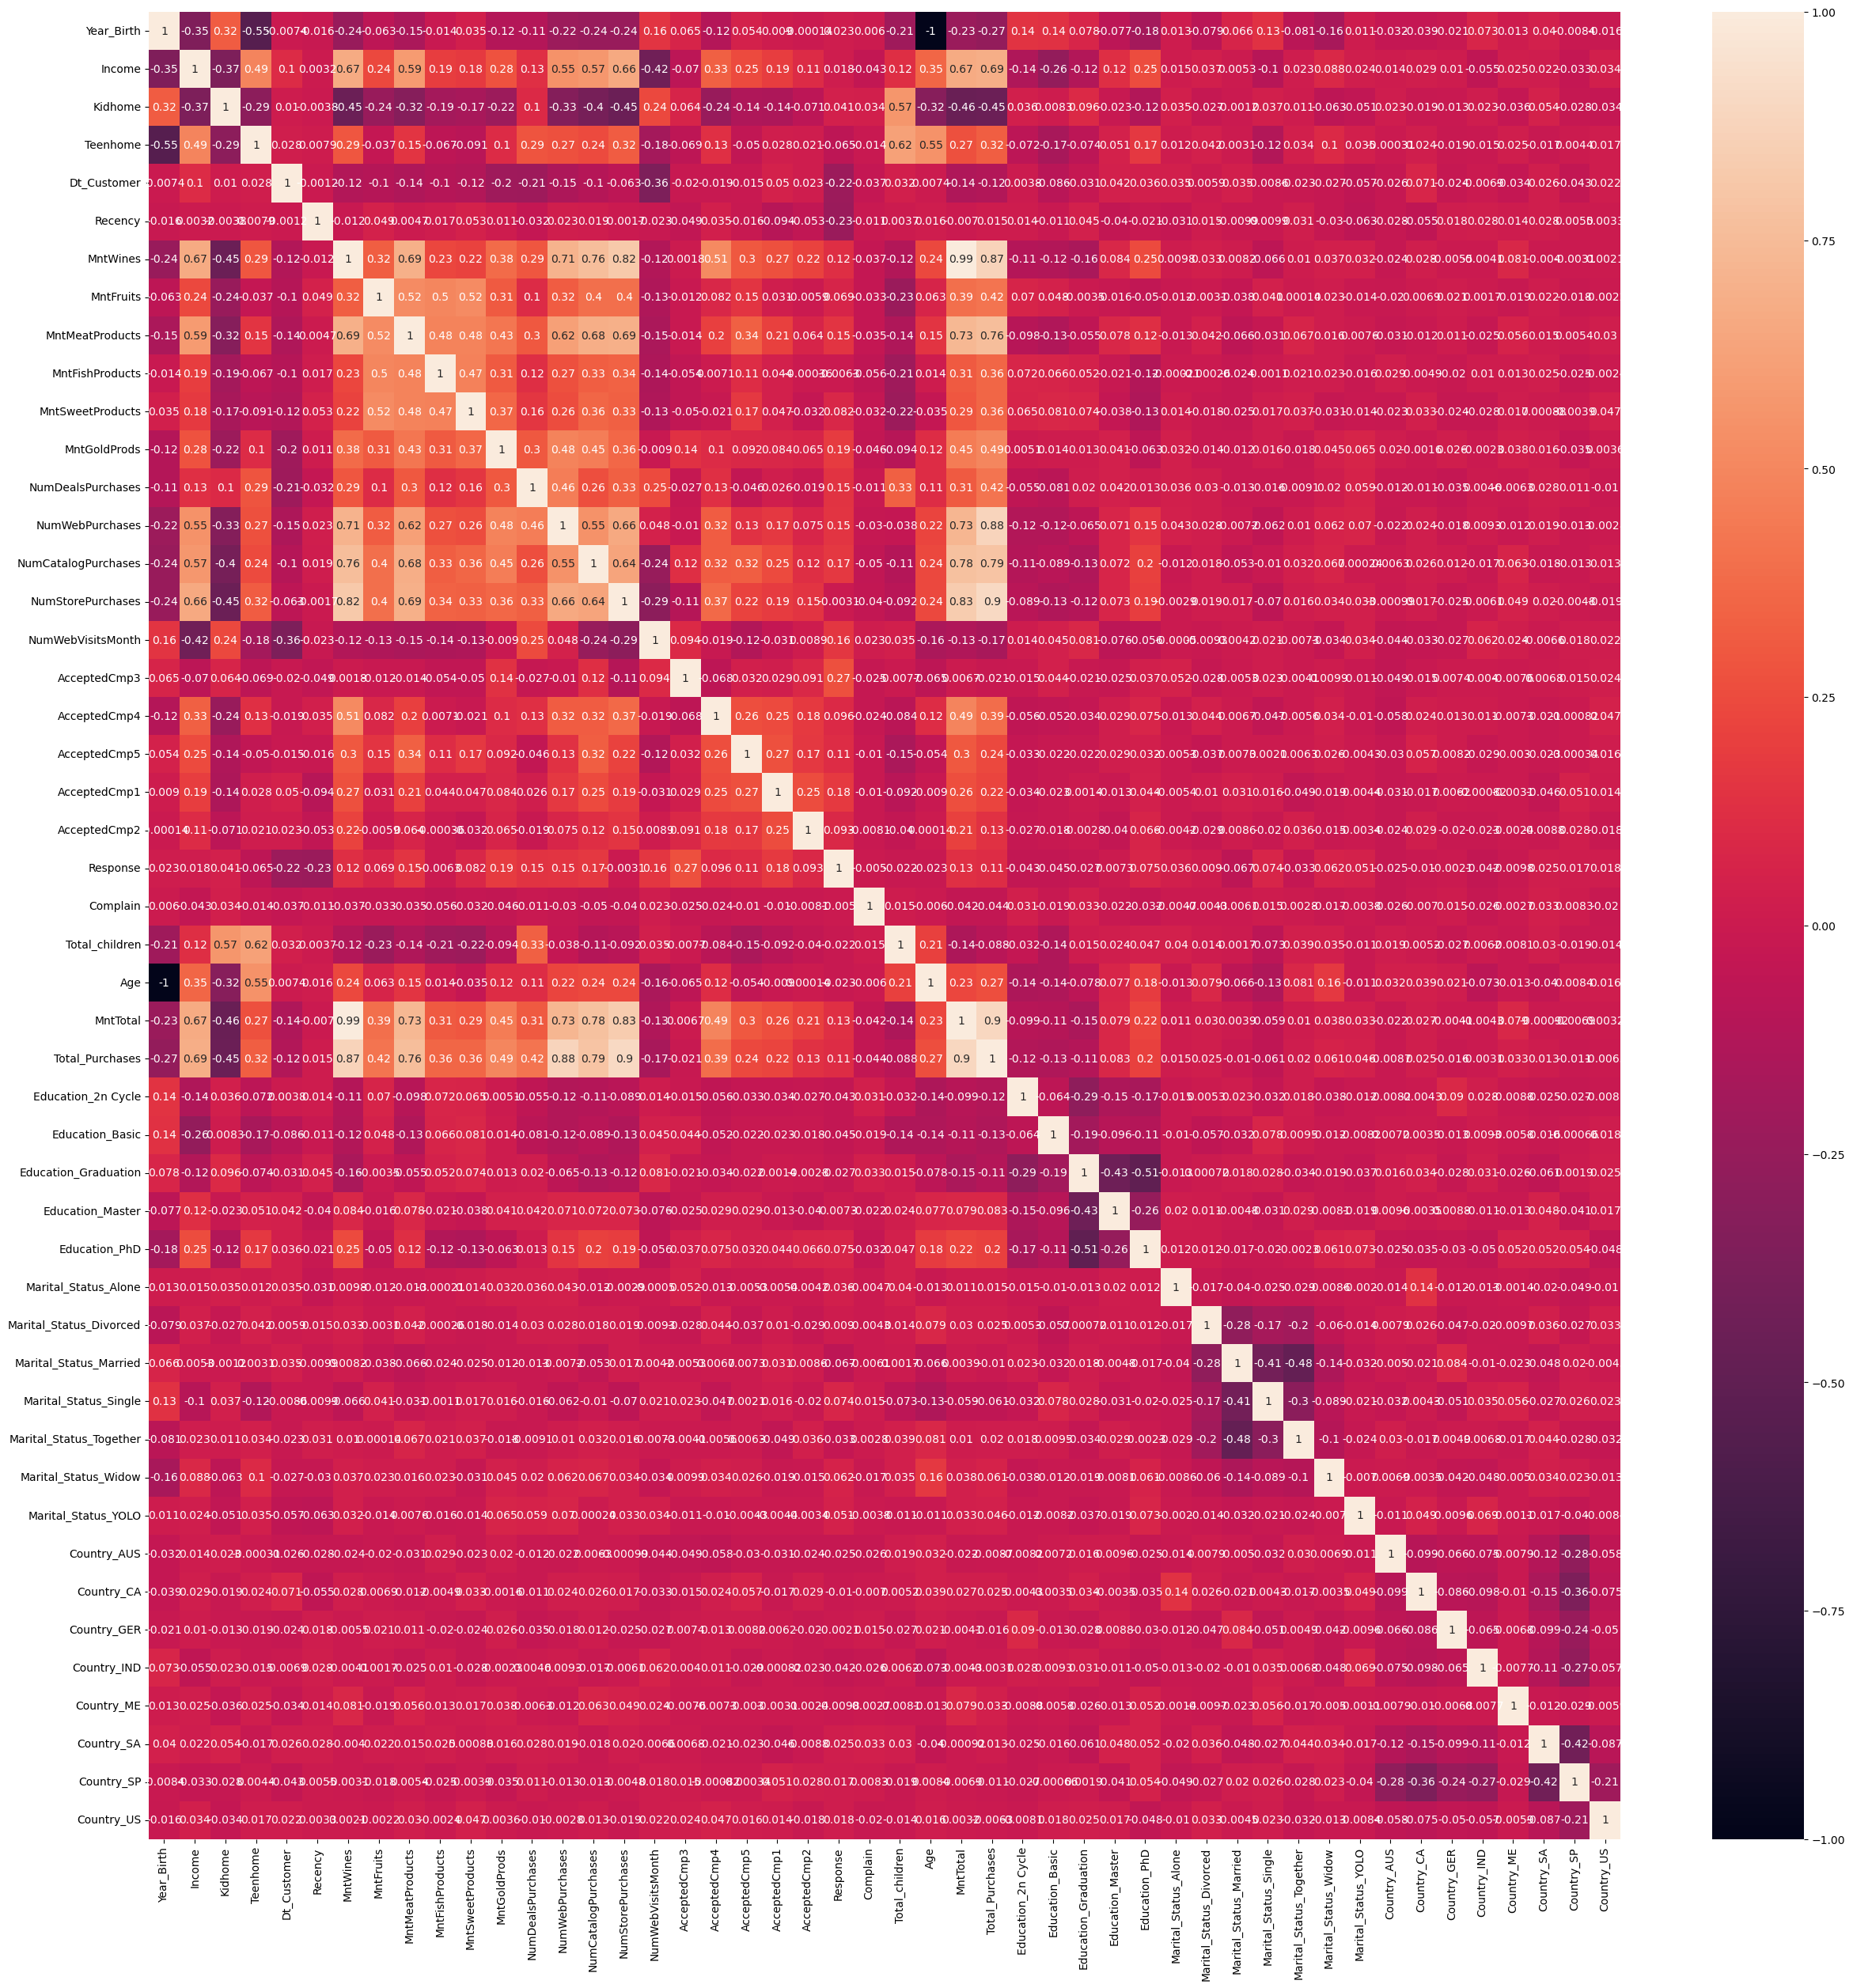

In [38]:
plt.figure(figsize=(30, 30))
sns.heatmap(df4.corr(), annot = True)

•	Test the following hypotheses:

o	Older people are not as tech-savvy and probably prefer shopping in-store.
o	Customers with kids probably have less time to visit a store and would prefer to shop online.
o	Other distribution channels may cannibalize sales at the store.
o	Does the US fare significantly better than the rest of the world in terms of total purchases?


In [39]:
df4.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,...,False,False,False,True,False,False,False,False,False,False
2,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,...,False,False,False,False,False,False,False,False,False,True
3,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,...,False,False,True,False,False,False,False,False,False,False
4,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,...,False,False,False,False,False,False,False,False,True,False
7,1967,44931.0,0,1,2014-01-18,0,78,0,11,0,...,False,False,False,False,False,False,False,False,True,False


In [40]:
df4['Age'] = df4['Age'].apply(lambda x: 'young_adult' if 28 <= x < 46 else 'adult' if 46 <= x < 62 else 'old' if x >= 62 else x)
df4['Age']

1               old
2               old
3             adult
4       young_adult
7             adult
           ...     
2231          adult
2232          adult
2234          adult
2236          adult
2237          adult
Name: Age, Length: 1240, dtype: object

In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 1 to 2237
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year_Birth               1240 non-null   int64         
 1   Income                   1240 non-null   float64       
 2   Kidhome                  1240 non-null   int64         
 3   Teenhome                 1240 non-null   int64         
 4   Dt_Customer              1240 non-null   datetime64[ns]
 5   Recency                  1240 non-null   int64         
 6   MntWines                 1240 non-null   int64         
 7   MntFruits                1240 non-null   int64         
 8   MntMeatProducts          1240 non-null   int64         
 9   MntFishProducts          1240 non-null   int64         
 10  MntSweetProducts         1240 non-null   int64         
 11  MntGoldProds             1240 non-null   int64         
 12  NumDealsPurchases        1240 non-null 

In [42]:
df3.groupby('Country')['Total_Purchases'].sum()

Country
AUS     700
CA     1204
GER     521
IND     685
ME       14
SA     1514
SP     5013
US      414
Name: Total_Purchases, dtype: int64

In [43]:
o	Which products are performing the best, and which are performing the least in terms of revenue?

Object `revenue` not found.


<Axes: xlabel='Products', ylabel='Sales'>

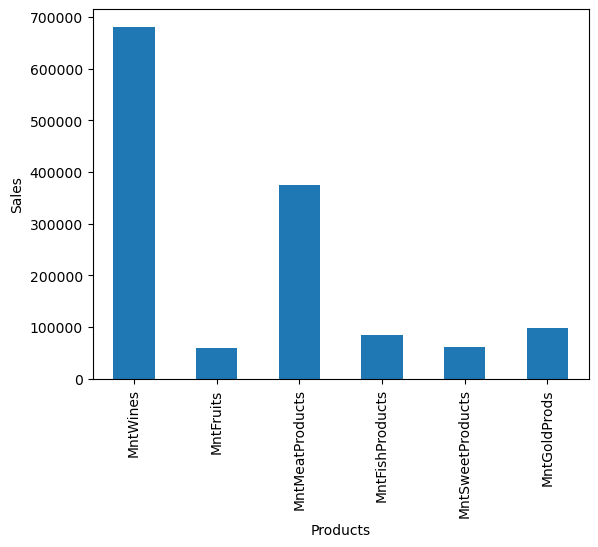

In [44]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().plot(kind = 'bar' , xlabel = 'Products' , ylabel = 'Sales')

<Axes: ylabel='Sales'>

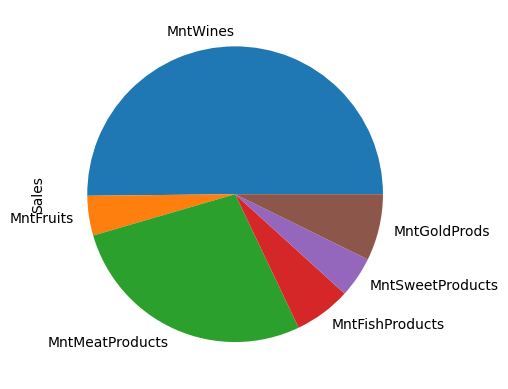

In [45]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().plot(kind = 'pie' , xlabel = 'Products' , ylabel = 'Sales')

o	Which Country has the greatest number of customers who accepted the last campaign?

<Axes: title={'center': 'People choosing last Campaign'}, xlabel='Country', ylabel='Count'>

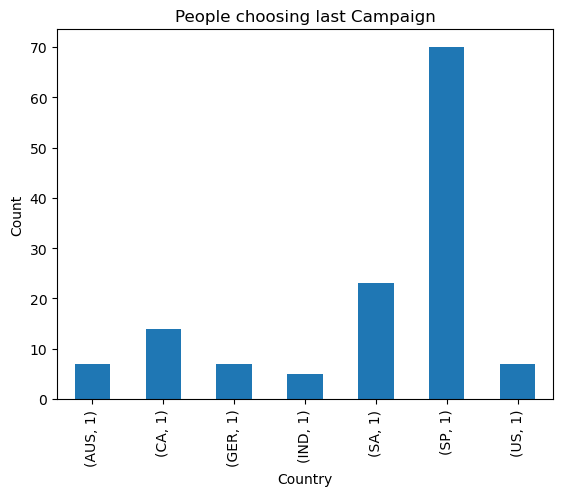

In [46]:
df3[df3['Response']==1].groupby('Country')['Response'].value_counts().plot(kind = 'bar', xlabel = 'Country' , ylabel = 'Count', title = 'People choosing last Campaign',)

<Axes: xlabel='No. of Children', ylabel='Amount Spend'>

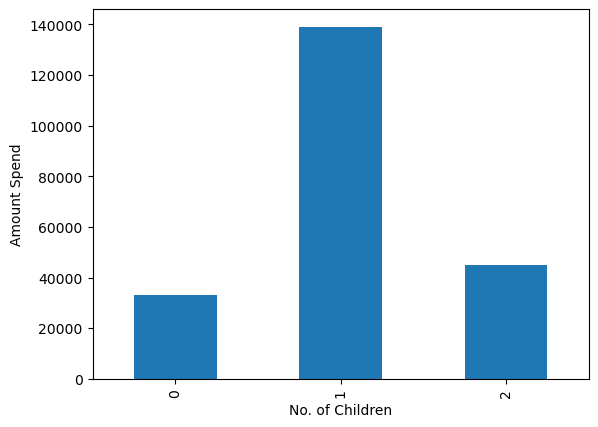

In [47]:
df4.groupby(['Total_children'])['MntTotal'].sum().plot(kind = 'bar', xlabel = 'No. of Children', ylabel = 'Amount Spend')

o	Which products are performing the best, and which are performing the least in terms of revenue?
# Wines brings the most Revenue and SweetProducts brings the Least Revenue
o	Is there any pattern between the age of customers and the last campaign acceptance rate?
o	Which Country has the greatest number of customers who accepted the last campaign?
# SP has the greatest number of customers who accepted the last campaign
o	Do you see any pattern in the no. of children at home and total spend?
# people with no child or 2 children have comparitabily less expenses than people with single child , so there is no particular pattern in the no. of children at home and total spend
o	Education background of the customers who complained in the last 2 years.
# Most complains are by Graduates and no complains by basic educated people

In [48]:
df4.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'Total_children', 'Age', 'MntTotal', 'Total_Purchases',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_AUS',
       'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA',
       'Country_SP', 'Country_US'],
      dtype='object')

<Axes: xlabel='Education', ylabel='Count'>

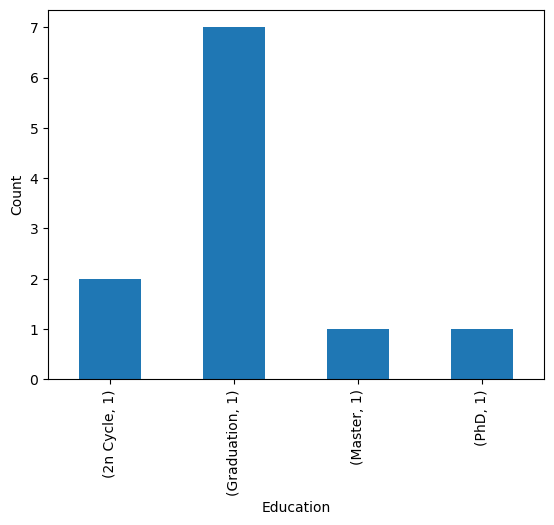

In [49]:
df3[df3['Complain']==1].groupby('Education')['Complain'].value_counts().plot(kind = 'bar', xlabel = 'Education' , ylabel = 'Count')

In [50]:
import numpy as np
from scipy import stats

In [51]:
# hypotheses for Older people are not as tech-savvy and probably prefer shopping in-store.
threshold=1978
older_customers = df4[df4['Year_Birth'] >= threshold]
younger_customers = df4[df4['Year_Birth'] < threshold]
from scipy.stats import ttest_ind, mannwhitneyu
# Perform t-test
t_statistic, p_value = ttest_ind(older_customers['NumWebPurchases'], 
younger_customers['NumWebPurchases'])
# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(older_customers['NumWebPurchases'],  younger_customers['NumWebPurchases'])

In [52]:
t_statistic, p_value

(-6.737026332214217, 8.992875982087897e-10)

In [53]:
u_statistic, p_value

(116180.5, 8.992875982087897e-10)

The t-test result (-6.73 , p < 0.001) indicates a statistically  no significant difference between 
the average number of web purchases made by older and younger customers.
Conclusion
Older people are as tech-savvy and probably prefer shopping in-store: The t-test
results (t = -6.73 , p < 0.001) indicate a significant difference in web purchases 
between older and younger customers, rejecting the hypothesis that older 
customers are less tech-savvy and prefer shopping in-store.
These findings provide valuable insights into product performance, campaign acceptance, 
spending patterns, and customer complaints, aiding in decision-making and targeting 
strategies

In [54]:
without_children = df4[df4['Total_children'] == 0]
without_children

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,...,False,False,False,True,False,False,False,False,False,False
13,1981,26872.0,0,0,2013-10-16,0,3,10,8,3,...,False,False,False,True,False,False,False,False,False,False
34,1990,18351.0,0,0,2013-10-29,1,1,12,9,0,...,False,False,False,False,False,False,False,False,True,False
37,1960,39228.0,0,0,2013-05-10,1,7,1,6,0,...,False,False,False,False,False,False,False,True,False,False
79,1947,27469.0,0,0,2012-08-02,2,9,1,2,3,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,1964,42523.0,0,0,2014-04-23,96,14,36,11,3,...,False,False,False,False,True,False,False,False,False,False
2160,1964,42523.0,0,0,2014-04-23,96,14,36,11,3,...,False,False,False,True,False,False,False,False,False,False
2171,1940,51141.0,0,0,2013-07-08,96,144,0,7,0,...,False,False,False,False,False,False,False,False,True,False
2229,1974,20130.0,0,0,2014-03-17,99,0,6,3,7,...,False,False,False,False,False,False,False,False,True,False


In [55]:
with_children = df4[df4['Total_children'] != 0]
with_children

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
2,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,...,False,False,False,False,False,False,False,False,False,True
3,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,...,False,False,True,False,False,False,False,False,False,False
4,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,...,False,False,False,False,False,False,False,False,True,False
7,1967,44931.0,0,1,2014-01-18,0,78,0,11,0,...,False,False,False,False,False,False,False,False,True,False
11,1979,62499.0,1,0,2013-12-09,0,140,4,61,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1973,42429.0,0,1,2014-02-11,99,55,0,6,2,...,True,False,True,False,False,False,False,False,False,False
2232,1973,42429.0,0,1,2014-02-11,99,55,0,6,2,...,True,False,False,False,False,False,False,False,True,False
2234,1973,78901.0,0,1,2013-09-17,99,321,11,309,33,...,False,False,False,False,False,False,False,False,False,True
2236,1977,31056.0,1,0,2013-01-22,99,5,10,13,3,...,False,False,False,False,False,False,False,False,True,False


In [56]:
t_statistic, p_value = ttest_ind(with_children['NumStorePurchases'], without_children['NumStorePurchases'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -1.2501355032631856
P-value: 0.21148630567329638


The t-test result (-1.25 , p > 0.001) indicates a statistically there is no significant difference between 
Customers with kids and customers without kids to visit a store.
Conclusion
Both customers with and without kids visit the store : The t-test
results (t = -1.25 , p > 0.001) 

In [57]:
df4.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'Total_children', 'Age', 'MntTotal', 'Total_Purchases',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_AUS',
       'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA',
       'Country_SP', 'Country_US'],
      dtype='object')

In [58]:
US_Purchases = df3[df3['Country'] == 'US']['Total_Purchases']
Rest_Purchases = df3[df3['Country'].isin(['AUS', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP'])]['Total_Purchases']

In [59]:
t_statistic, p_value = ttest_ind(US_Purchases, Rest_Purchases)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -0.22246322695969498
P-value: 0.8239899914095343


The t-test result (-0.222 , p > 0.001) indicates a statistically there is no significant difference between 
Total_Purchases of US and rest

In [60]:
Store_Sales = df4['NumStorePurchases']
Store_Sales

1       7
2       5
3       2
4       2
7       3
       ..
2231    3
2232    3
2234    5
2236    3
2237    5
Name: NumStorePurchases, Length: 1240, dtype: int64

In [61]:
Other_Sales = df4[['NumWebPurchases','NumCatalogPurchases']].sum(axis = 1)
Other_Sales

1       10
2        5
3        1
4        4
7        3
        ..
2231     2
2232     2
2234    12
2236     1
2237     7
Length: 1240, dtype: int64

In [62]:
t_statistic, p_value = ttest_ind(Store_Sales, Other_Sales)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 1.3262956540688722
P-value: 0.1848640107690787


The t-test result (1.32 , p > 0.001) indicates a statistically there is no proof that sources can cannibalise the store sales